### Author----> Abhishek Kumar
### Project---> End To End Chatbot Project

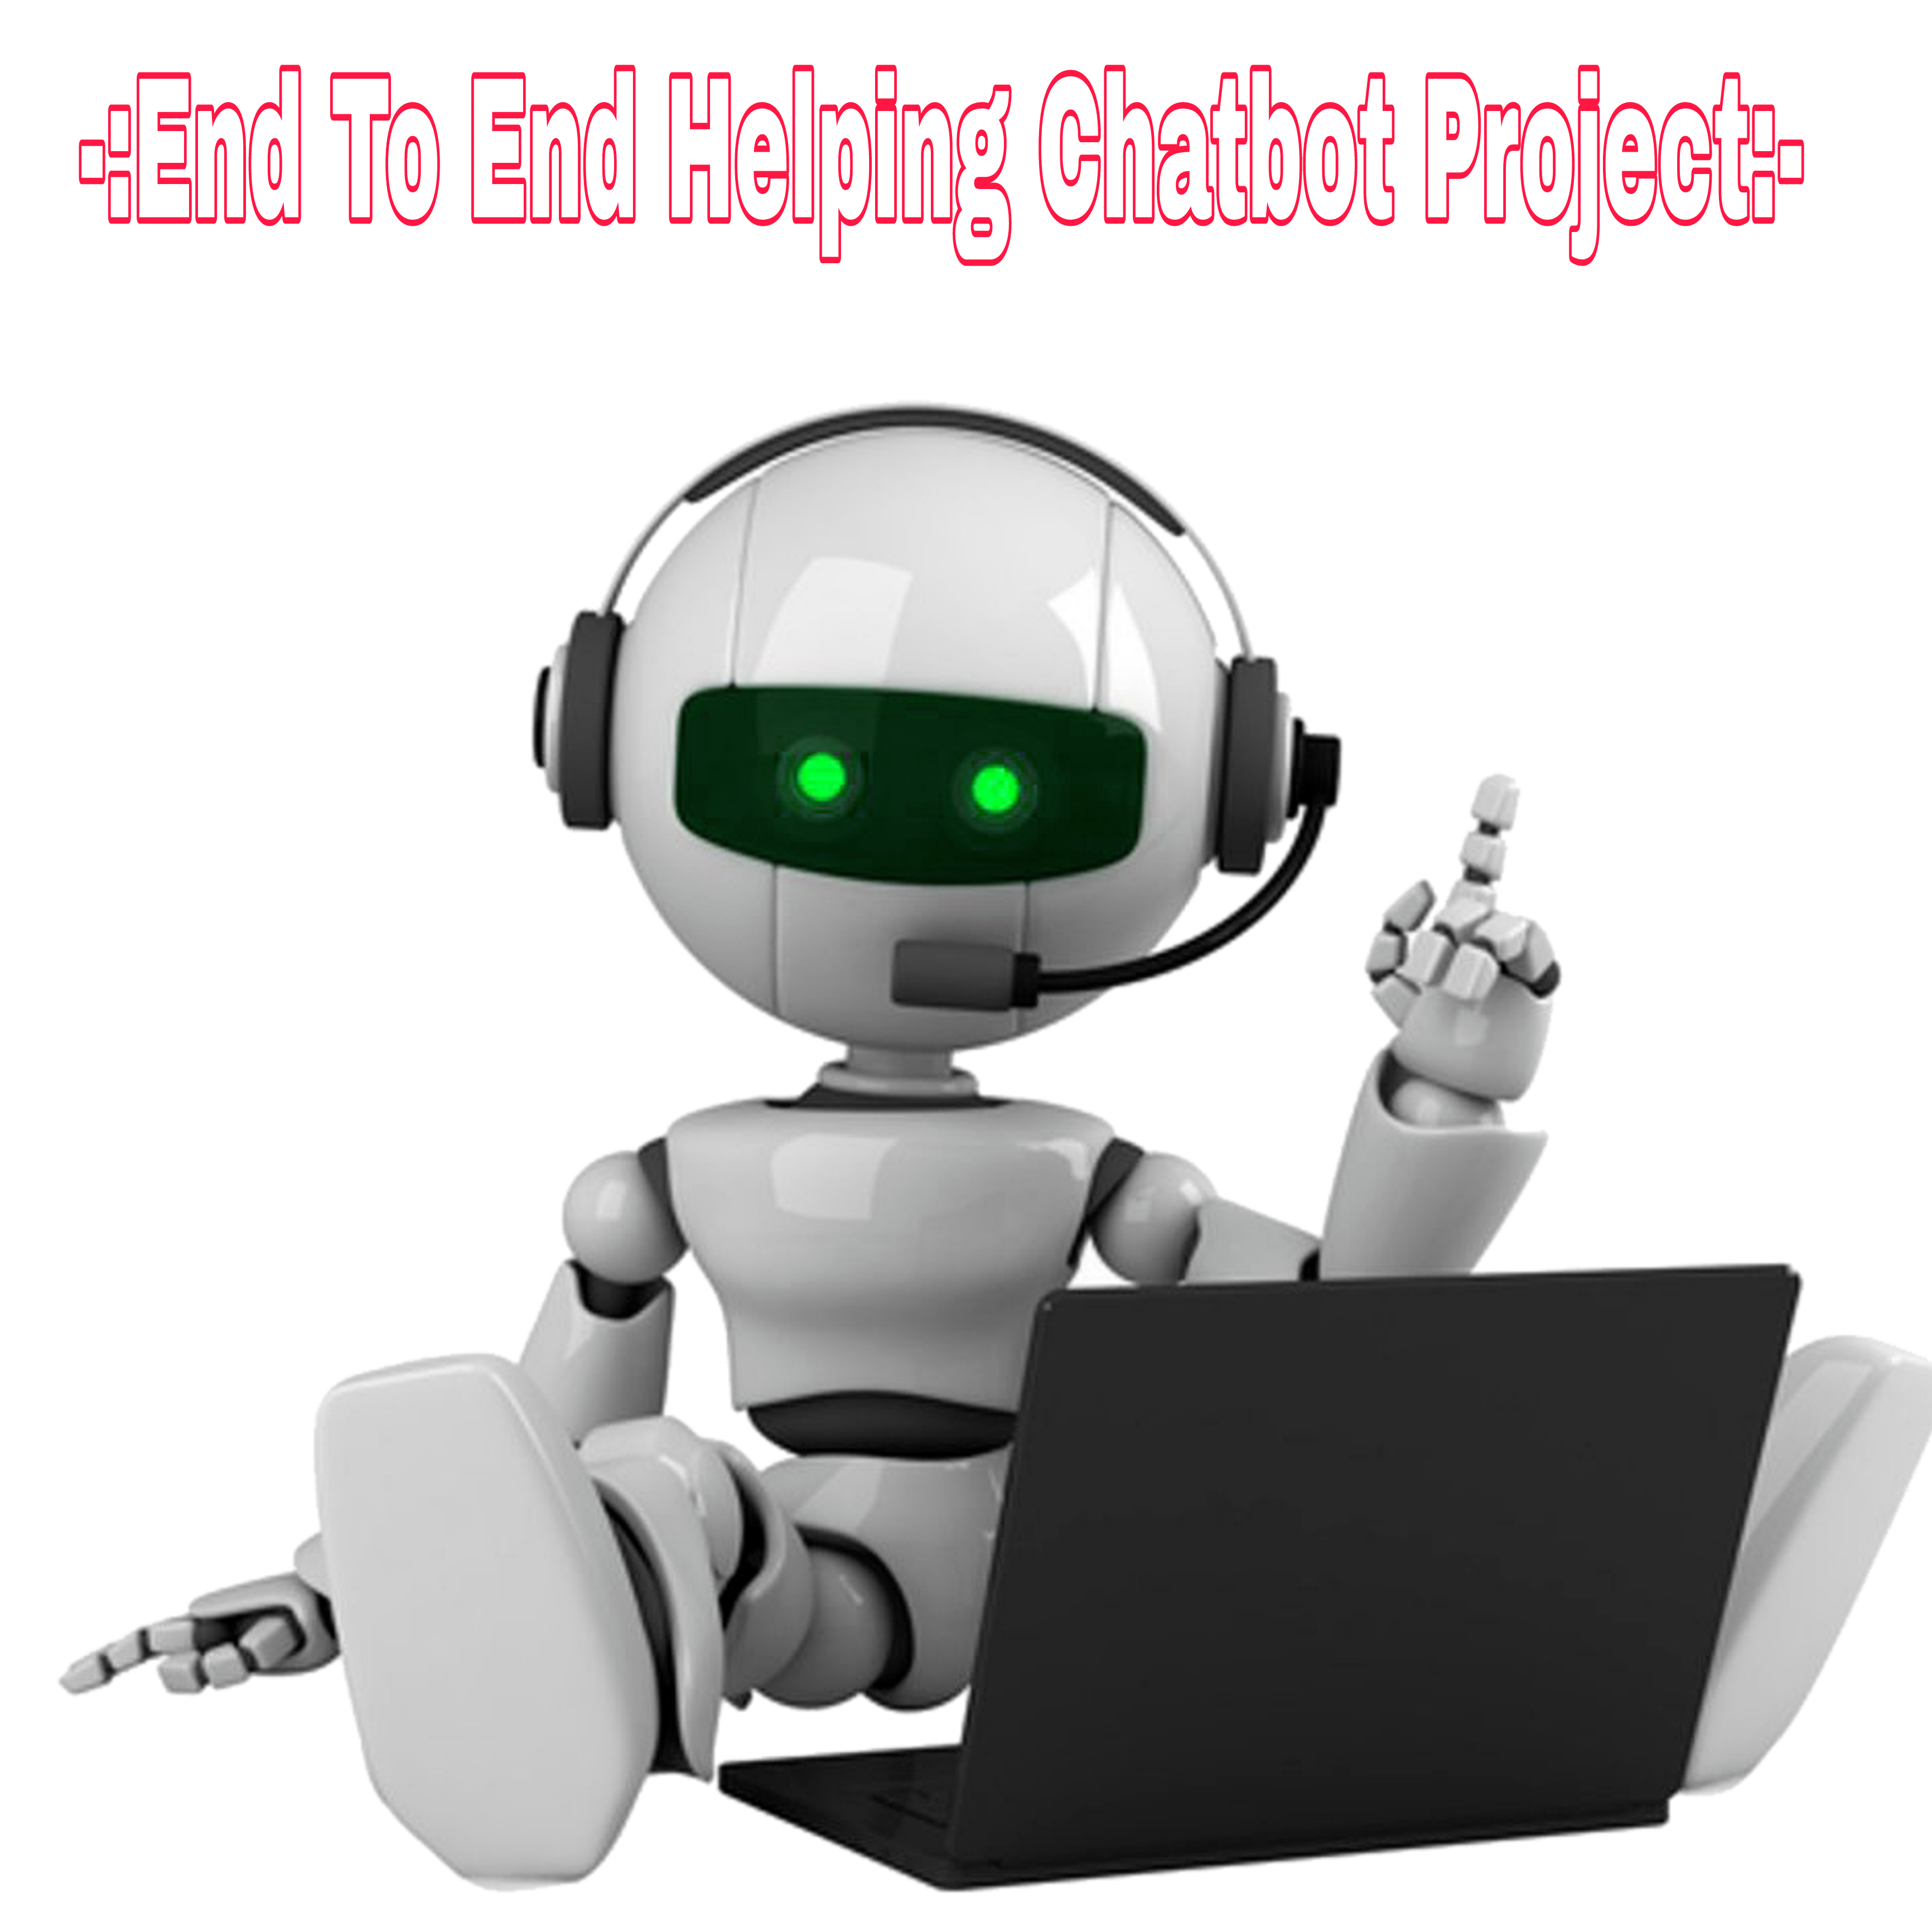

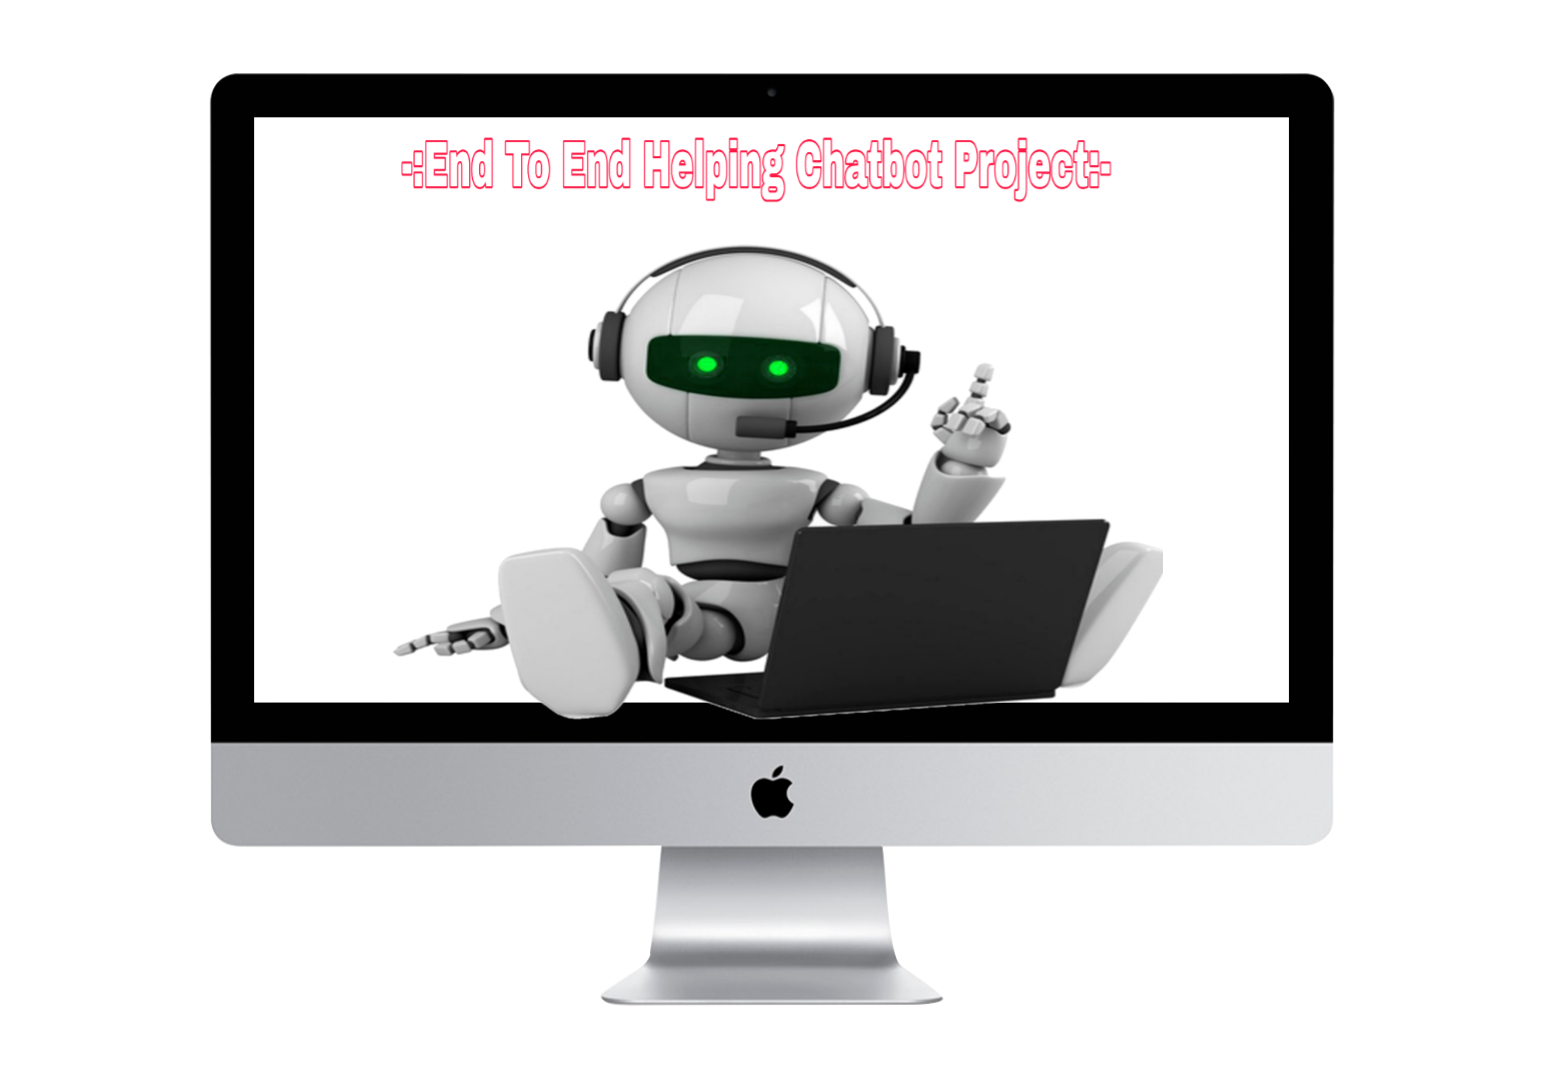

In [1]:
import nltk
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
intents = [
    {
        "tag": "greeting",
        "patterns": ["Hi", "Hello", "Hey", "How are you", "What's up"],
        "responses": ["Hi there", "Hello", "Hey", "I'm fine, thank you", "Nothing much"]
    },
    {
        "tag": "goodbye",
        "patterns": ["Bye", "See you later", "Goodbye", "Take care"],
        "responses": ["Goodbye", "See you later", "Take care"]
    },
    {
        "tag": "thanks",
        "patterns": ["Thank you", "Thanks", "Thanks a lot", "I appreciate it"],
        "responses": ["You're welcome", "No problem", "Glad I could help"]
    },
    {
        "tag": "about",
        "patterns": ["What can you do", "Who are you", "What are you", "What is your purpose"],
        "responses": ["I am a chatbot", "My purpose is to assist you", "I can answer questions and provide assistance"]
    },
    {
        "tag": "help",
        "patterns": ["Help", "I need help", "Can you help me", "What should I do"],
        "responses": ["Sure, what do you need help with?", "I'm here to help. What's the problem?", "How can I assist you?"]
    },
    {
        "tag": "age",
        "patterns": ["How old are you", "What's your age"],
        "responses": ["I don't have an age. I'm a chatbot.", "I was just born in the digital world.", "Age is just a number for me."]
    },
    {
        "tag": "weather",
        "patterns": ["What's the weather like", "How's the weather today"],
        "responses": ["I'm sorry, I cannot provide real-time weather information.", "You can check the weather on a weather app or website."]
    },
    {
        "tag": "budget",
        "patterns": ["How can I make a budget", "What's a good budgeting strategy", "How do I create a budget"],
        "responses": ["To make a budget, start by tracking your income and expenses. Then, allocate your income towards essential expenses like rent, food, and bills. Next, allocate some of your income towards savings and debt repayment. Finally, allocate the remainder of your income towards discretionary expenses like entertainment and hobbies.", "A good budgeting strategy is to use the 50/30/20 rule. This means allocating 50% of your income towards essential expenses, 30% towards discretionary expenses, and 20% towards savings and debt repayment.", "To create a budget, start by setting financial goals for yourself. Then, track your income and expenses for a few months to get a sense of where your money is going. Next, create a budget by allocating your income towards essential expenses, savings and debt repayment, and discretionary expenses."]
    },
    {
        "tag": "credit_score",
        "patterns": ["What is a credit score", "How do I check my credit score", "How can I improve my credit score"],
        "responses": ["A credit score is a number that represents your creditworthiness. It is based on your credit history and is used by lenders to determine whether or not to lend you money. The higher your credit score, the more likely you are to be approved for credit.", "You can check your credit score for free on several websites such as Credit Karma and Credit Sesame."]
    },
    {"tag": "greetings",
     "patterns": ["Hello there", "Hey, How are you", "Hey", "Hi", "Hello", "Anybody", "Hey there"],
     "responses": ["Hello, I'm your helping bot", "Hey it's good to see you", "Hi there, how can I help you?"],
     "context": [""]
    },
    {"tag": "thanks",
     "patterns": ["Thanks for your quick response", "Thank you for providing the valuable information", "Awesome, thanks for helping"],
     "responses": ["Happy to help you", "Thanks for reaching out to me", "It's My pleasure to help you"],
     "context": [""]
    },
    {"tag": "no_answer",
     "patterns": [],
     "responses": ["Sorry, Could you repeat again", "provide me more info", "can't understand you"],
     "context": [""]
    },
    {"tag": "support",
     "patterns": ["What help you can do?", "What are the helps you provide?", "How you could help me", "What support is offered by you"],
     "responses": [ "ticket booking for airline", "I can help you to book flight tickets easily"],
     "context": [""]
    },
    {"tag": "goodbye",
        "patterns": ["bye bye", "Nice to chat with you", "Bye", "See you later buddy", "Goodbye"],
        "responses": [ "bye bye, thanks for reaching", "Have a nice day there", "See you later"],
        "context": [""]
    }
]

In [4]:
vectorizer = TfidfVectorizer()

In [5]:
classifier = LogisticRegression(random_state=0, max_iter=10000)
tags=[]
patterns=[]

for i in intents:
    for pattern in i['patterns']:
        tags.append(i["tag"]);
        patterns.append(pattern)

x=vectorizer.fit_transform(patterns) 
y=tags
classifier.fit(x,y)

LogisticRegression(max_iter=10000, random_state=0)

In [6]:
def chatbot_response(text):
    input_text = vectorizer.transform([text])
    tagsdata = classifier.predict(input_text)[0]
    for i in intents:
        if i["tag"] == tagsdata:
            response = random.choice(i['responses'])
            return response

In [7]:
chatbot_response("What are the helps you provide?")

'I can help you to book flight tickets easily'

In [ ]:
while True:
    query = input("User-> ")
    output = chatbot_response(query)
    print("Chatbot-> {}".format(output))

User->  Hi


Chatbot-> Hi there, how can I help you?


User->  Hello


Chatbot-> Hello, I'm your helping bot


User->  How are you


Chatbot-> Hello


User->  What's up


Chatbot-> Hi there


User->  What can you do


Chatbot-> My purpose is to assist you


User->  who are you


Chatbot-> I am a chatbot


User->  what is your purpose


Chatbot-> I am a chatbot


User->  Help, I need help


Chatbot-> Sure, what do you need help with?


User->  What should I do


Chatbot-> How can I assist you?


User->  What's the weather like


Chatbot-> You can check the weather on a weather app or website.


User->  How can i make a budget


Chatbot-> To make a budget, start by tracking your income and expenses. Then, allocate your income towards essential expenses like rent, food, and bills. Next, allocate some of your income towards savings and debt repayment. Finally, allocate the remainder of your income towards discretionary expenses like entertainment and hobbies.


User->  what is a credit score


Chatbot-> You can check your credit score for free on several websites such as Credit Karma and Credit Sesame.


User->  How can I improve my Credit score


Chatbot-> You can check your credit score for free on several websites such as Credit Karma and Credit Sesame.


User->  good bye


Chatbot-> See you later


User->  bye


Chatbot-> Goodbye


User->  thank you


Chatbot-> No problem


User->  thanks


Chatbot-> You're welcome


User->  bye


Chatbot-> Take care
